### **Data Understanding**

In [1]:
import pandas as pd
import os

In [2]:
directory_path = "D:\Swetha Documents\RE-CT_PROJECT\DataSets"

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\sweth\AppData\Local\Temp\ipykernel_25424\1054989578.py:1: SyntaxWarning: invalid escape sequence '\S'
  directory_path = "D:\Swetha Documents\RE-CT_PROJECT\DataSets"


In [3]:
csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

In [4]:
dataframes = [pd.read_csv(os.path.join(directory_path, file), encoding='latin1') for file in csv_files]

In [5]:
merged_df = pd.concat(dataframes, ignore_index=True)

In [6]:
merged_df.reset_index(drop=True, inplace=True)

In [7]:
merged_df.head(3)

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
0,`12,`000,STATE - ARUNACHAL PRADESH,`00,`000,`0000,Total,211353,160166,51187,...,22132,38415,19776,18639,24581,12610,11971,13834,7166,6668
1,`12,`000,STATE - ARUNACHAL PRADESH,`01,`000,`0000,"Crop and animal production, hunting and relate...",12967,8180,4787,...,736,2975,1211,1764,2545,1004,1541,430,207,223
2,`12,`000,STATE - ARUNACHAL PRADESH,`01,`011,`0000,Growing of non-perennial crops,2373,1352,1021,...,363,1164,563,601,906,441,465,258,122,136


In [8]:
merged_df.isnull().sum()

State Code                             0
District Code                          0
India/States                           0
Division                               0
Group                                  0
Class                                  0
NIC Name                               0
Main Workers - Total -  Persons        0
Main Workers - Total - Males           0
Main Workers - Total - Females         0
Main Workers - Rural -  Persons        0
Main Workers - Rural - Males           0
Main Workers - Rural - Females         0
Main Workers - Urban -  Persons        0
Main Workers - Urban - Males           0
Main Workers - Urban - Females         0
Marginal Workers - Total -  Persons    0
Marginal Workers - Total - Males       0
Marginal Workers - Total - Females     0
Marginal Workers - Rural -  Persons    0
Marginal Workers - Rural - Males       0
Marginal Workers - Rural - Females     0
Marginal Workers - Urban -  Persons    0
Marginal Workers - Urban - Males       0
Marginal Workers

In [9]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195145 entries, 0 to 195144
Data columns (total 25 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   State Code                           195145 non-null  object
 1   District Code                        195145 non-null  object
 2   India/States                         195145 non-null  object
 3   Division                             195145 non-null  object
 4   Group                                195145 non-null  object
 5   Class                                195145 non-null  object
 6   NIC Name                             195145 non-null  object
 7   Main Workers - Total -  Persons      195145 non-null  int64 
 8   Main Workers - Total - Males         195145 non-null  int64 
 9   Main Workers - Total - Females       195145 non-null  int64 
 10  Main Workers - Rural -  Persons      195145 non-null  int64 
 11  Main Workers - Rural - Mal

### **Data Preprocessing**

In [10]:
# Separate state and district names
merged_df[['STATE', 'District']] = merged_df['India/States'].str.split(' - ', expand=True)

# Function to separate state and district names
def separate_state_district(row):
    # Split the string based on the separator '-'
    parts = row.split(' - ')

    # If the first part is in uppercase (assumed to be state name), return it
    if parts[0].isupper():
        return parts[0]
    else:
        return None

# Apply the function to create a new column for state names
merged_df['State Name'] = merged_df['District'].apply(separate_state_district)

# Filter out None values and then print unique state names with commas
state_names = merged_df['State Name'].dropna().unique()
print(", ".join(state_names))


ARUNACHAL PRADESH, ASSAM, BIHAR, NCT OF DELHI, GOA, GUJARAT, HIMACHAL PRADESH, JHARKHAND, KARNATAKA, KERALA, MAHARASHTRA, MANIPUR, MIZORAM, NAGALAND, ODISHA, PUDUCHERRY, RAJASTHAN, SIKKIM, TAMIL NADU, TRIPURA, UTTARAKHAND, UTTAR PRADESH, WEST BENGAL


In [11]:
# Save DataFrame to CSV
merged_df.to_csv('human_resource2.csv', index=False)

In [12]:
merged_df["India/States"].unique()

array(['STATE - ARUNACHAL PRADESH', 'District - Tawang',
       'District - West Kameng', 'District - East Kameng',
       'District - Papum Pare', 'District - Upper Subansiri',
       'District - West Siang', 'District - East Siang',
       'District - Upper Siang', 'District - Changlang',
       'District - Tirap', 'District - Lower Subansiri',
       'District - Kurung Kumey', 'District - Dibang Valley',
       'District - Lower Dibang Valley', 'District - Lohit',
       'District - Anjaw', 'STATE - ASSAM', 'District - Kokrajhar',
       'District - Dhubri', 'District - Goalpara', 'District - Barpeta',
       'District - Morigaon', 'District - Nagaon', 'District - Sonitpur',
       'District - Lakhimpur', 'District - Dhemaji',
       'District - Tinsukia', 'District - Dibrugarh',
       'District - Sivasagar', 'District - Jorhat', 'District - Golaghat',
       'District - Karbi Anglong', 'District - Dima Hasao',
       'District - Cachar', 'District - Karimganj',
       'District - 

In [13]:
# Function to extract unique state names from the "India/States" column
def extract_states(data):
    # Split the entries by the string " - "
    split_data = data.str.split(" - ", expand=True)

    # The first part of the split will contain the state names
    states = split_data.iloc[:, 0].unique()

    return states

# Extract unique state names
unique_states = extract_states(merged_df["India/States"])
print(unique_states)


['STATE' 'District']


In [14]:
merged_df.shape

(195145, 28)

In [15]:
merged_df.columns

Index(['State Code', 'District Code', 'India/States', 'Division', 'Group',
       'Class', 'NIC Name', 'Main Workers - Total -  Persons',
       'Main Workers - Total - Males', 'Main Workers - Total - Females',
       'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males',
       'Main Workers - Rural - Females', 'Main Workers - Urban -  Persons',
       'Main Workers - Urban - Males', 'Main Workers - Urban - Females',
       'Marginal Workers - Total -  Persons',
       'Marginal Workers - Total - Males',
       'Marginal Workers - Total - Females',
       'Marginal Workers - Rural -  Persons',
       'Marginal Workers - Rural - Males',
       'Marginal Workers - Rural - Females',
       'Marginal Workers - Urban -  Persons',
       'Marginal Workers - Urban - Males',
       'Marginal Workers - Urban - Females', 'STATE', 'District',
       'State Name'],
      dtype='object')

In [16]:
merged_df.head(2)

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females,STATE,District,State Name
0,`12,`000,STATE - ARUNACHAL PRADESH,`00,`000,`0000,Total,211353,160166,51187,...,18639,24581,12610,11971,13834,7166,6668,STATE,ARUNACHAL PRADESH,ARUNACHAL PRADESH
1,`12,`000,STATE - ARUNACHAL PRADESH,`01,`000,`0000,"Crop and animal production, hunting and relate...",12967,8180,4787,...,1764,2545,1004,1541,430,207,223,STATE,ARUNACHAL PRADESH,ARUNACHAL PRADESH


In [17]:
merged_df["State Code"].unique()

array(['`12', '`18', '`10', '`07', '`30', '`24', '`02', '`20', '`29',
       '`32', '`27', '`14', '`15', '`13', '`21', '`34', '`08', '`11',
       '`33', '`16', '`05', '`09', '`19'], dtype=object)

In [18]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195145 entries, 0 to 195144
Data columns (total 28 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   State Code                           195145 non-null  object
 1   District Code                        195145 non-null  object
 2   India/States                         195145 non-null  object
 3   Division                             195145 non-null  object
 4   Group                                195145 non-null  object
 5   Class                                195145 non-null  object
 6   NIC Name                             195145 non-null  object
 7   Main Workers - Total -  Persons      195145 non-null  int64 
 8   Main Workers - Total - Males         195145 non-null  int64 
 9   Main Workers - Total - Females       195145 non-null  int64 
 10  Main Workers - Rural -  Persons      195145 non-null  int64 
 11  Main Workers - Rural - Mal

In [19]:
# Handling Missing Values
# Check for missing values in the DataFrame
missing_values = merged_df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 State Code                                  0
District Code                               0
India/States                                0
Division                                    0
Group                                       0
Class                                       0
NIC Name                                    0
Main Workers - Total -  Persons             0
Main Workers - Total - Males                0
Main Workers - Total - Females              0
Main Workers - Rural -  Persons             0
Main Workers - Rural - Males                0
Main Workers - Rural - Females              0
Main Workers - Urban -  Persons             0
Main Workers - Urban - Males                0
Main Workers - Urban - Females              0
Marginal Workers - Total -  Persons         0
Marginal Workers - Total - Males            0
Marginal Workers - Total - Females          0
Marginal Workers - Rural -  Persons         0
Marginal Workers - Rural - Males            0
Marginal Workers 

In [20]:
# Removing Duplicates
# Check for duplicate rows in the DataFrame
duplicate_rows = merged_df.duplicated()
print("Duplicate Rows:\n", duplicate_rows)

Duplicate Rows:
 0         False
1         False
2         False
3         False
4         False
          ...  
195140    False
195141    False
195142    False
195143    False
195144    False
Length: 195145, dtype: bool


In [21]:
# Summary statistics
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Main Workers - Total - Persons,195145.0,1492.137518,45681.690979,0.0,6.0,28.0,188.0,15619759.0
Main Workers - Total - Males,195145.0,1193.171150,37739.170774,0.0,6.0,23.0,145.0,12801403.0
Main Workers - Total - Females,195145.0,298.966369,8582.018644,0.0,0.0,3.0,24.0,2818356.0
Main Workers - Rural - Persons,195145.0,660.618719,20444.364940,0.0,2.0,12.0,74.0,6770444.0
Main Workers - Rural - Males,195145.0,517.035312,16542.946109,0.0,1.0,8.0,56.0,5446541.0
Main Workers - Rural - Females,195145.0,143.583407,4314.446369,0.0,0.0,0.0,8.0,1323903.0
Main Workers - Urban - Persons,195145.0,831.518799,25867.811792,0.0,2.0,12.0,86.0,8849315.0
Main Workers - Urban - Males,195145.0,676.135837,21673.393792,0.0,1.0,9.0,67.0,7354862.0
Main Workers - Urban - Females,195145.0,155.382961,4531.592781,0.0,0.0,0.0,12.0,1494453.0
Marginal Workers - Total - Persons,195145.0,364.267186,11769.400296,0.0,0.0,4.0,28.0,3834122.0


In [22]:
merged_df.columns

Index(['State Code', 'District Code', 'India/States', 'Division', 'Group',
       'Class', 'NIC Name', 'Main Workers - Total -  Persons',
       'Main Workers - Total - Males', 'Main Workers - Total - Females',
       'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males',
       'Main Workers - Rural - Females', 'Main Workers - Urban -  Persons',
       'Main Workers - Urban - Males', 'Main Workers - Urban - Females',
       'Marginal Workers - Total -  Persons',
       'Marginal Workers - Total - Males',
       'Marginal Workers - Total - Females',
       'Marginal Workers - Rural -  Persons',
       'Marginal Workers - Rural - Males',
       'Marginal Workers - Rural - Females',
       'Marginal Workers - Urban -  Persons',
       'Marginal Workers - Urban - Males',
       'Marginal Workers - Urban - Females', 'STATE', 'District',
       'State Name'],
      dtype='object')

In [23]:
merged_df['State Code'] = merged_df['State Code'].astype(str).str.replace('`', '').astype(int)
merged_df['District Code'] = merged_df['District Code'].astype(str).str.replace('`', '').astype(int)
merged_df['Division'] = merged_df['Division'].astype(str).str.replace('`', '').astype(int)
merged_df['Group'] = merged_df['Group'].astype(str).str.replace('`', '').astype(int)

In [24]:
merged_df.shape

(195145, 28)

In [25]:
merged_df['State Code'].unique()

array([12, 18, 10,  7, 30, 24,  2, 20, 29, 32, 27, 14, 15, 13, 21, 34,  8,
       11, 33, 16,  5,  9, 19])

In [26]:
merged_df['District Code'].unique()

array([  0, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256,
       257, 258, 259, 260, 300, 301, 302, 303, 304, 305, 306, 307, 308,
       309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321,
       322, 323, 324, 325, 326, 203, 204, 205, 206, 207, 208, 209, 210,
       211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223,
       224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236,
       237, 238, 239, 240,  90,  91,  92,  93,  94,  95,  96,  97,  98,
       585, 586, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
        34, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357,
       358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 555,
       556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568,
       569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 58

In [27]:
merged_df.isna().sum()

State Code                                  0
District Code                               0
India/States                                0
Division                                    0
Group                                       0
Class                                       0
NIC Name                                    0
Main Workers - Total -  Persons             0
Main Workers - Total - Males                0
Main Workers - Total - Females              0
Main Workers - Rural -  Persons             0
Main Workers - Rural - Males                0
Main Workers - Rural - Females              0
Main Workers - Urban -  Persons             0
Main Workers - Urban - Males                0
Main Workers - Urban - Females              0
Marginal Workers - Total -  Persons         0
Marginal Workers - Total - Males            0
Marginal Workers - Total - Females          0
Marginal Workers - Rural -  Persons         0
Marginal Workers - Rural - Males            0
Marginal Workers - Rural - Females

In [28]:
merged_df['Total_workers'] = (merged_df['Main Workers - Total -  Persons'] + merged_df['Marginal Workers - Total -  Persons'])
merged_df['MaleFemaleRatio'] = merged_df['Main Workers - Total - Males'] / (merged_df['Main Workers - Total - Females'].replace(0, 1))
merged_df.head(2)

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females,STATE,District,State Name,Total_workers,MaleFemaleRatio
0,12,0,STATE - ARUNACHAL PRADESH,0,0,`0000,Total,211353,160166,51187,...,12610,11971,13834,7166,6668,STATE,ARUNACHAL PRADESH,ARUNACHAL PRADESH,249768,3.129037
1,12,0,STATE - ARUNACHAL PRADESH,1,0,`0000,"Crop and animal production, hunting and relate...",12967,8180,4787,...,1004,1541,430,207,223,STATE,ARUNACHAL PRADESH,ARUNACHAL PRADESH,15942,1.708795


In [29]:
# Remove duplicate rows from the DataFrame
merged_df = merged_df.drop_duplicates()

# Confirm the removal of duplicates
print("Shape after removing duplicates:", merged_df.shape)

Shape after removing duplicates: (195145, 30)


In [30]:
merged_df['District'].unique()

array(['ARUNACHAL PRADESH', 'Tawang', 'West Kameng', 'East Kameng',
       'Papum Pare', 'Upper Subansiri', 'West Siang', 'East Siang',
       'Upper Siang', 'Changlang', 'Tirap', 'Lower Subansiri',
       'Kurung Kumey', 'Dibang Valley', 'Lower Dibang Valley', 'Lohit',
       'Anjaw', 'ASSAM', 'Kokrajhar', 'Dhubri', 'Goalpara', 'Barpeta',
       'Morigaon', 'Nagaon', 'Sonitpur', 'Lakhimpur', 'Dhemaji',
       'Tinsukia', 'Dibrugarh', 'Sivasagar', 'Jorhat', 'Golaghat',
       'Karbi Anglong', 'Dima Hasao', 'Cachar', 'Karimganj', 'Hailakandi',
       'Bongaigaon', 'Chirang', 'Kamrup', 'Kamrup Metropolitan',
       'Nalbari', 'Baksa', 'Darrang', 'Udalguri', 'BIHAR',
       'Pashchim Champaran', 'Purba Champaran', 'Sheohar', 'Sitamarhi',
       'Madhubani', 'Supaul', 'Araria', 'Kishanganj', 'Purnia', 'Katihar',
       'Madhepura', 'Saharsa', 'Darbhanga', 'Muzaffarpur', 'Gopalganj',
       'Siwan', 'Saran', 'Vaishali', 'Samastipur', 'Begusarai',
       'Khagaria', 'Bhagalpur', 'Banka', 'Mu

### **EDA & Data Visualization**

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

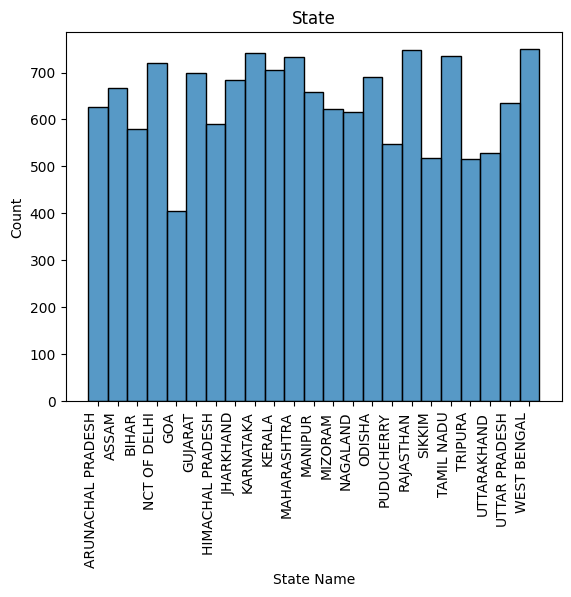

In [32]:
sns.histplot(x='State Name',data=merged_df)
plt.xticks(rotation=90, ha='right')
plt.title('State')
plt.show()

In [33]:
merged_df.columns

Index(['State Code', 'District Code', 'India/States', 'Division', 'Group',
       'Class', 'NIC Name', 'Main Workers - Total -  Persons',
       'Main Workers - Total - Males', 'Main Workers - Total - Females',
       'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males',
       'Main Workers - Rural - Females', 'Main Workers - Urban -  Persons',
       'Main Workers - Urban - Males', 'Main Workers - Urban - Females',
       'Marginal Workers - Total -  Persons',
       'Marginal Workers - Total - Males',
       'Marginal Workers - Total - Females',
       'Marginal Workers - Rural -  Persons',
       'Marginal Workers - Rural - Males',
       'Marginal Workers - Rural - Females',
       'Marginal Workers - Urban -  Persons',
       'Marginal Workers - Urban - Males',
       'Marginal Workers - Urban - Females', 'STATE', 'District', 'State Name',
       'Total_workers', 'MaleFemaleRatio'],
      dtype='object')

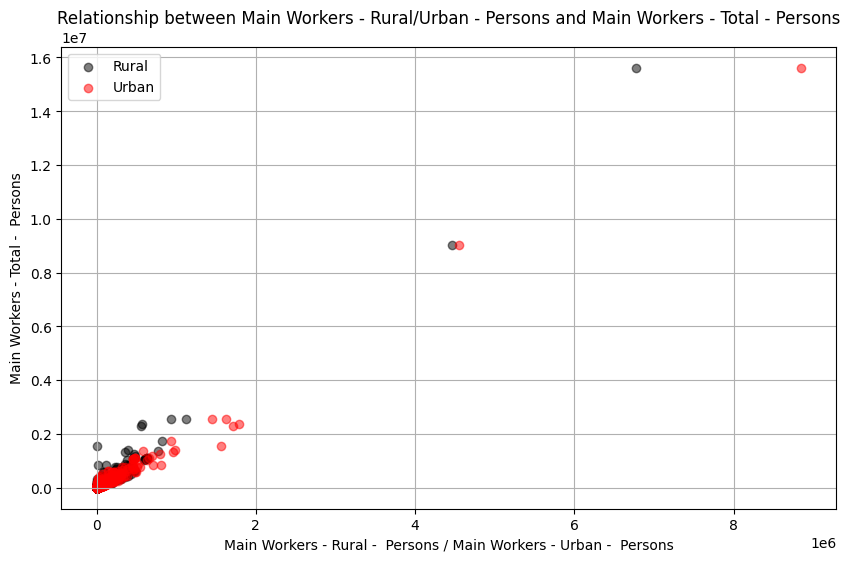

In [34]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Main Workers - Rural -  Persons'],merged_df['Main Workers - Total -  Persons'], label='Rural', color='black',alpha=0.5)
plt.scatter(merged_df['Main Workers - Urban -  Persons'],merged_df['Main Workers - Total -  Persons'], label='Urban',color='red',alpha=0.5)
plt.xlabel('Main Workers - Rural -  Persons / Main Workers - Urban -  Persons')
plt.ylabel('Main Workers - Total -  Persons')
plt.title('Relationship between Main Workers - Rural/Urban - Persons and Main Workers - Total - Persons')
plt.legend()
plt.grid(True)
plt.show()

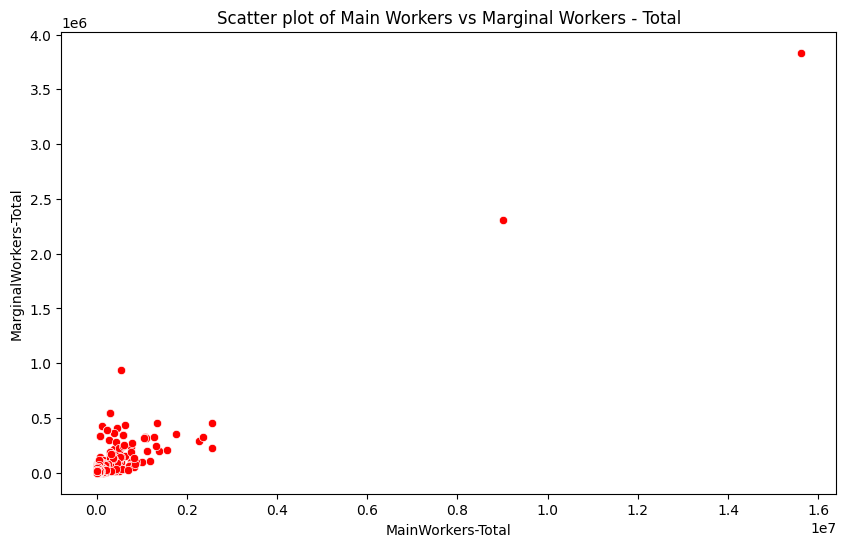

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Main Workers - Total -  Persons', y='Marginal Workers - Total -  Persons',data=merged_df,color='red')
plt.title('Scatter plot of Main Workers vs Marginal Workers - Total')
plt.xlabel('MainWorkers-Total')
plt.ylabel('MarginalWorkers-Total')
plt.show()

In [ ]:
non_numeric_columns = merged_df.select_dtypes(exclude=[float, int]).columns

# Drop non-numeric columns from the DataFrame
numeric_df = merged_df.drop(columns=non_numeric_columns)

# Calculate correlation
correlation_matrix = numeric_df.corr()
correlation_matrix

In [37]:
merged_df.columns

Index(['State Code', 'District Code', 'India/States', 'Division', 'Group',
       'Class', 'NIC Name', 'Main Workers - Total -  Persons',
       'Main Workers - Total - Males', 'Main Workers - Total - Females',
       'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males',
       'Main Workers - Rural - Females', 'Main Workers - Urban -  Persons',
       'Main Workers - Urban - Males', 'Main Workers - Urban - Females',
       'Marginal Workers - Total -  Persons',
       'Marginal Workers - Total - Males',
       'Marginal Workers - Total - Females',
       'Marginal Workers - Rural -  Persons',
       'Marginal Workers - Rural - Males',
       'Marginal Workers - Rural - Females',
       'Marginal Workers - Urban -  Persons',
       'Marginal Workers - Urban - Males',
       'Marginal Workers - Urban - Females', 'STATE', 'District', 'State Name',
       'Total_workers', 'MaleFemaleRatio'],
      dtype='object')

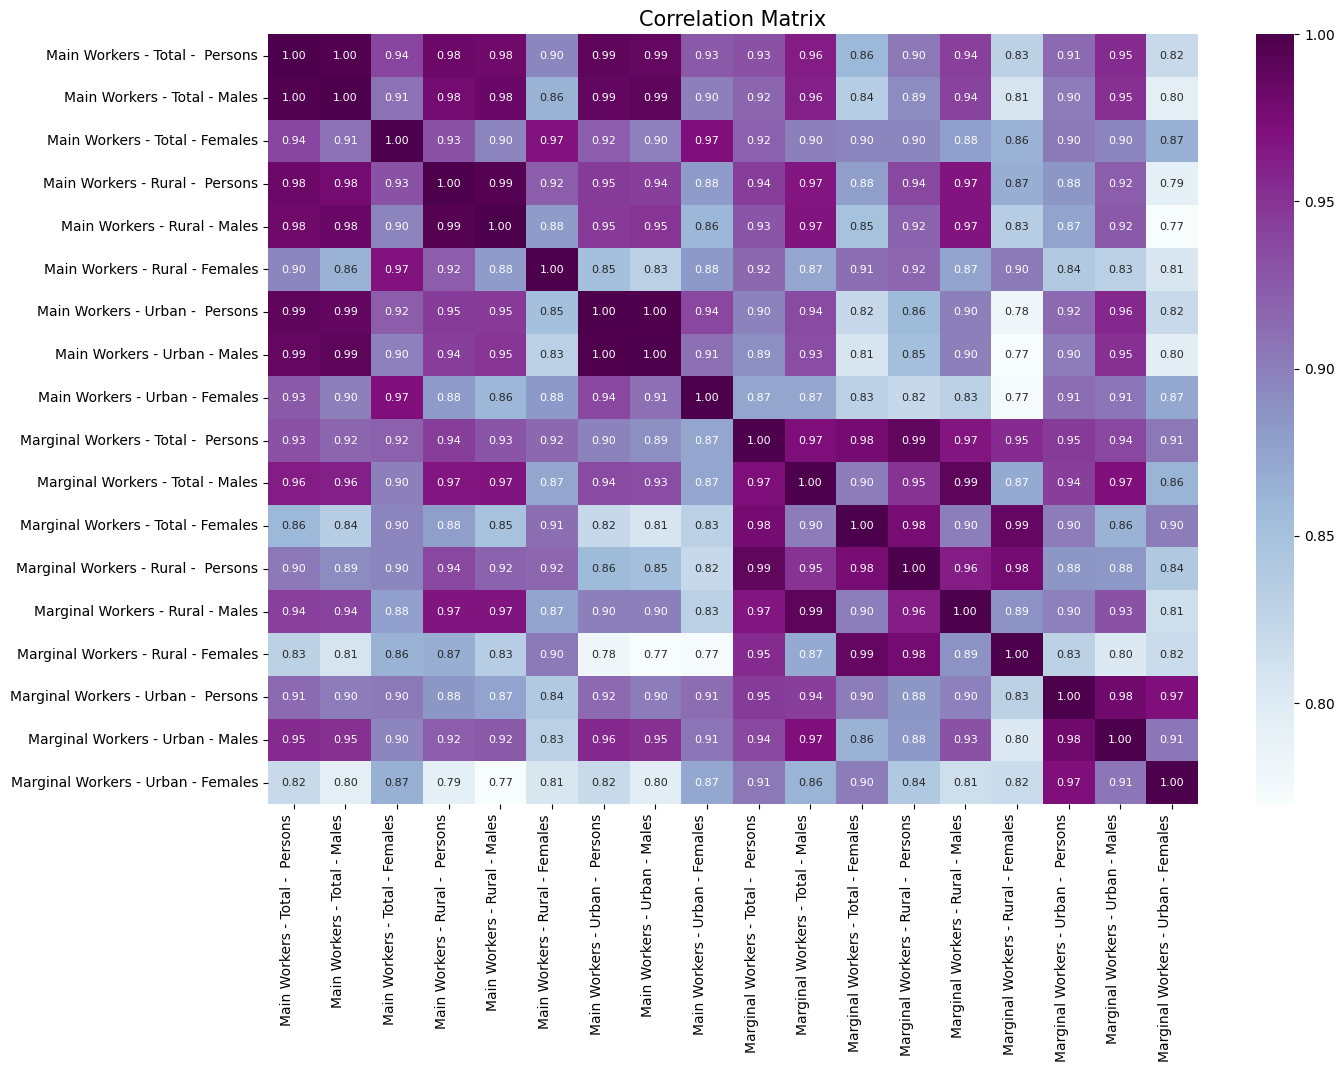

In [38]:
# Plot the correlation matrix
corrls=['Main Workers - Total -  Persons',
       'Main Workers - Total - Males', 'Main Workers - Total - Females',
       'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males',
       'Main Workers - Rural - Females', 'Main Workers - Urban -  Persons',
       'Main Workers - Urban - Males', 'Main Workers - Urban - Females',
       'Marginal Workers - Total -  Persons',
       'Marginal Workers - Total - Males',
       'Marginal Workers - Total - Females',
       'Marginal Workers - Rural -  Persons',
       'Marginal Workers - Rural - Males',
       'Marginal Workers - Rural - Females',
       'Marginal Workers - Urban -  Persons',
       'Marginal Workers - Urban - Males',
       'Marginal Workers - Urban - Females']
plt.figure(figsize=(15, 10))

# Plot the heatmap with adjusted settings
sns.heatmap(merged_df[corrls].corr(), annot=True, fmt='.2f', cmap='BuPu', annot_kws={"size": 8})

# Rotate tick labels
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Add title
plt.title('Correlation Matrix', fontsize=15)

# Display the plot
plt.show()

In [39]:
merged_df[['Total_workers','MaleFemaleRatio']].isnull().sum()

Total_workers      0
MaleFemaleRatio    0
dtype: int64

In [40]:
merged_df.columns

Index(['State Code', 'District Code', 'India/States', 'Division', 'Group',
       'Class', 'NIC Name', 'Main Workers - Total -  Persons',
       'Main Workers - Total - Males', 'Main Workers - Total - Females',
       'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males',
       'Main Workers - Rural - Females', 'Main Workers - Urban -  Persons',
       'Main Workers - Urban - Males', 'Main Workers - Urban - Females',
       'Marginal Workers - Total -  Persons',
       'Marginal Workers - Total - Males',
       'Marginal Workers - Total - Females',
       'Marginal Workers - Rural -  Persons',
       'Marginal Workers - Rural - Males',
       'Marginal Workers - Rural - Females',
       'Marginal Workers - Urban -  Persons',
       'Marginal Workers - Urban - Males',
       'Marginal Workers - Urban - Females', 'STATE', 'District', 'State Name',
       'Total_workers', 'MaleFemaleRatio'],
      dtype='object')

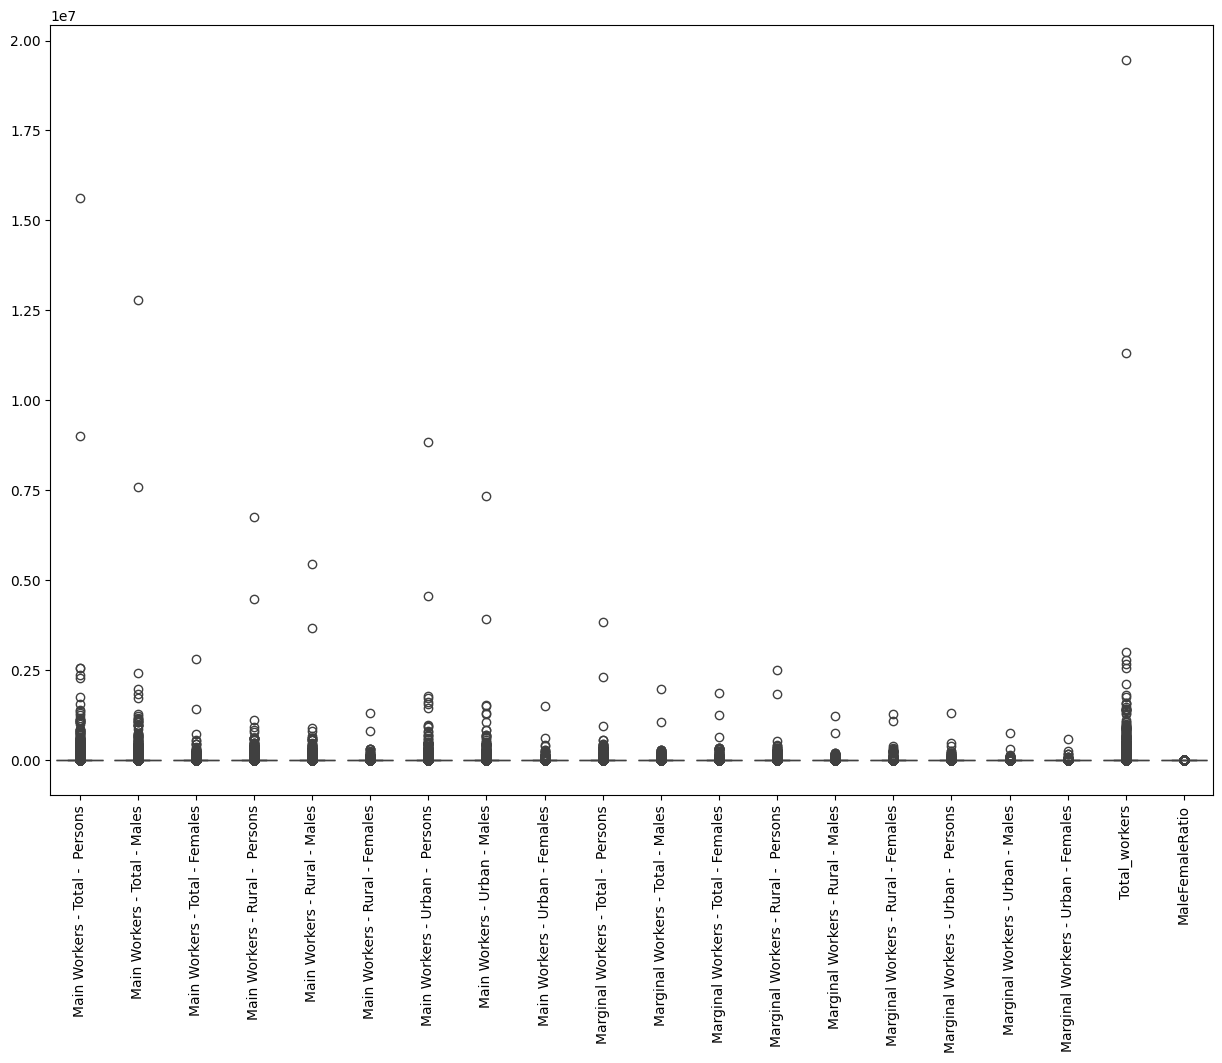

In [41]:
numerical_cols = ['Main Workers - Total -  Persons',
       'Main Workers - Total - Males', 'Main Workers - Total - Females',
       'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males',
       'Main Workers - Rural - Females', 'Main Workers - Urban -  Persons',
       'Main Workers - Urban - Males', 'Main Workers - Urban - Females',
       'Marginal Workers - Total -  Persons',
       'Marginal Workers - Total - Males',
       'Marginal Workers - Total - Females',
       'Marginal Workers - Rural -  Persons',
       'Marginal Workers - Rural - Males',
       'Marginal Workers - Rural - Females',
       'Marginal Workers - Urban -  Persons',
       'Marginal Workers - Urban - Males',
       'Marginal Workers - Urban - Females','Total_workers','MaleFemaleRatio']

# Visualizing outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=merged_df[numerical_cols])
plt.xticks(rotation=90)
plt.show()

In [42]:
# Detecting outliers using IQR
Q1 = merged_df[numerical_cols].quantile(0.25)
Q3 = merged_df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = (merged_df[numerical_cols] < (Q1 - 1.5 * IQR)) | (merged_df[numerical_cols] > (Q3 + 1.5 * IQR))

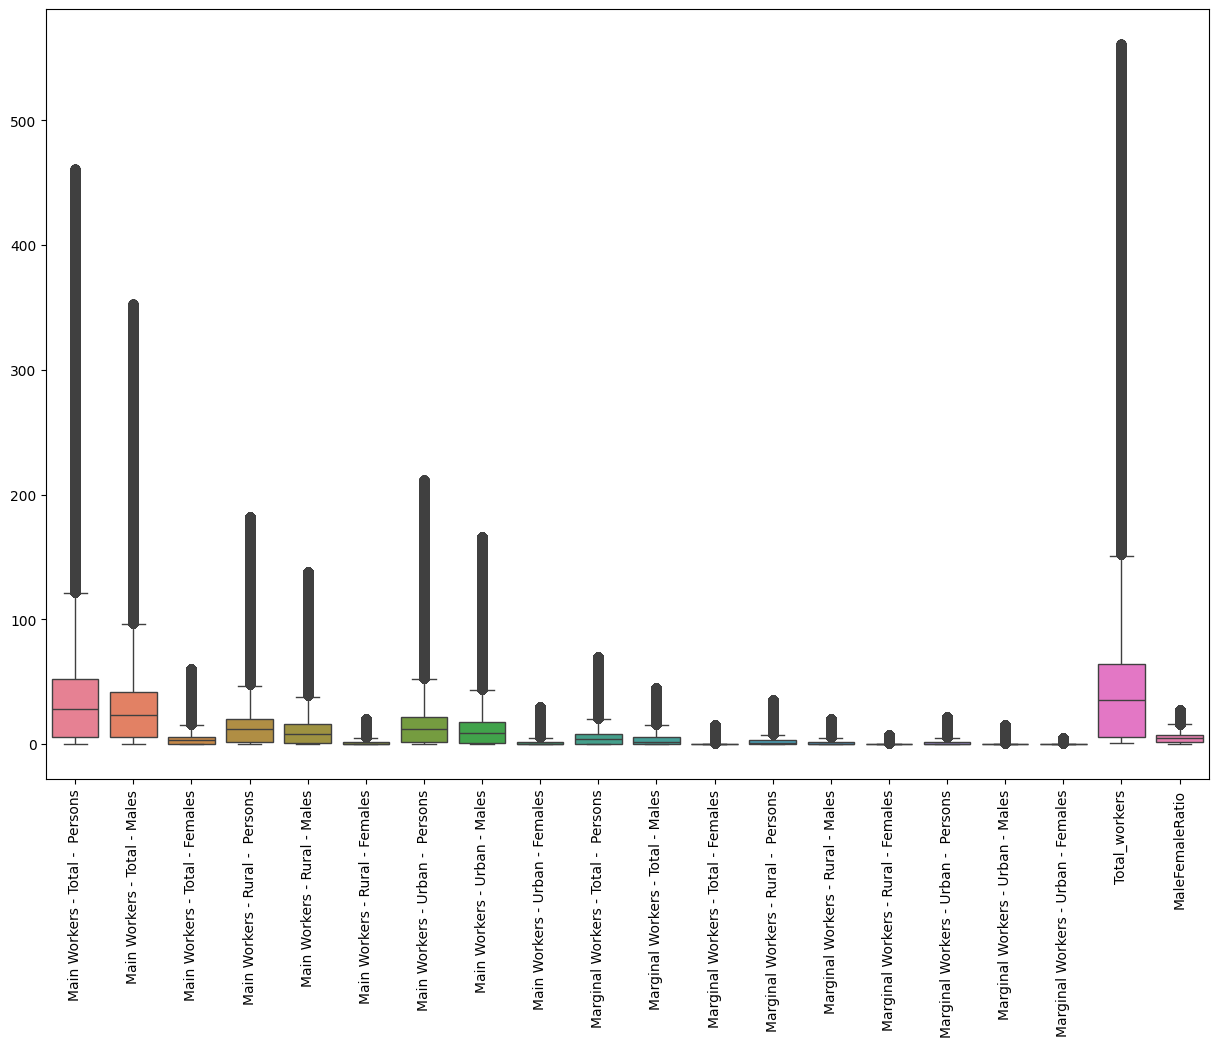

In [43]:
import numpy as np
# Alternatively, handling outliers
for col in numerical_cols:
    median = merged_df[col].median()
    Q1 = merged_df[col].quantile(0.25)
    Q3 = merged_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    merged_df[col] = np.where(merged_df[col] > upper_bound, median, merged_df[col])
    merged_df[col] = np.where(merged_df[col] < lower_bound, median, merged_df[col])

# Verifying no outliers left
plt.figure(figsize=(15, 10))
sns.boxplot(data=merged_df[numerical_cols])
plt.xticks(rotation=90)
plt.show()

### **NLP & ML**

In [45]:
# Download necessary NLTK data
# !pip install nltk
# nltk.download('punkt')
# nltk.download('stopwords')

     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ------------------ ------------------- 20.5/42.0 kB 330.3 kB/s eta 0:00:01
     -------------------------------------  41.0/42.0 kB 393.8 kB/s eta 0:00:01
     -------------------------------------- 42.0/42.0 kB 337.6 kB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     --------------------- ------------------ 30.7/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.5 MB 6.8 MB/s eta 0:00:01
   -------- ------------------------------- 0.3/1.5 MB 4.2 MB/s eta 0:00:01
   -------------------- ------------------- 0.8/1.5 MB 6.2 MB/s eta 0:00:01
   ------------------------------------ --- 1.4/1.5 MB 7.9 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 8.0 MB/s eta 0:00:00
   -----------


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sweth\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sweth\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


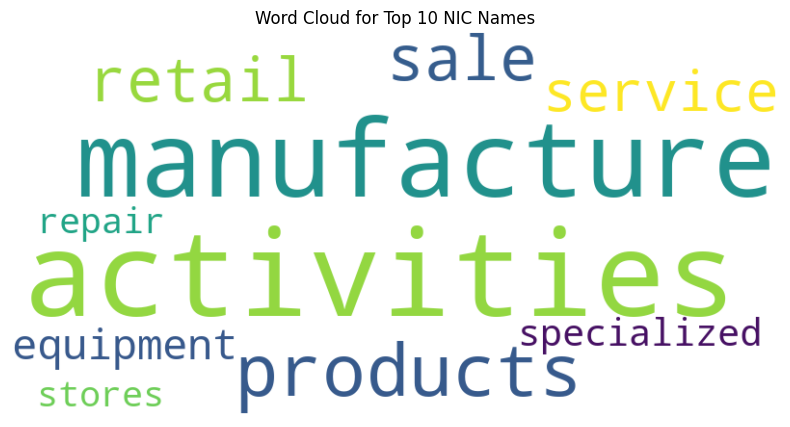

In [46]:
import os
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')


# Tokenize and clean text data
text = ' '.join(merged_df['NIC Name'])
tokens = word_tokenize(text)
tokens = [word.lower() for word in tokens if word.isalpha()]
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]

# Count word frequency
word_freq = Counter(tokens)
top_words = word_freq.most_common(10)

# Create a word cloud using the top words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_words))

# Display the word cloud
plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Top 10 NIC Names')
plt.axis('off')
plt.show()

In [69]:
import plotly.express as px

# Extract the top 10 most common words and their frequencies
top_words = [pair[0] for pair in word_freq.most_common(10)]
word_counts = [pair[1] for pair in word_freq.most_common(10)]

# Create a bar plot using Plotly
fig = px.bar(x=top_words, y=word_counts, labels={'x': 'Industry', 'y': 'Frequency'},
            title='Top 10 Industries by Frequency')
fig.show()

<>:44: SyntaxWarning:

invalid escape sequence '\S'

<>:44: SyntaxWarning:

invalid escape sequence '\S'

C:\Users\sweth\AppData\Local\Temp\ipykernel_25424\2108270971.py:44: SyntaxWarning:

invalid escape sequence '\S'

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sweth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sweth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('activities', 60058), ('manufacture', 46673), ('products', 17992), ('sale', 13293), ('retail', 12669), ('service', 10664), ('equipment', 9911), ('specialized', 8830), ('stores', 7821), ('repair', 7682)]


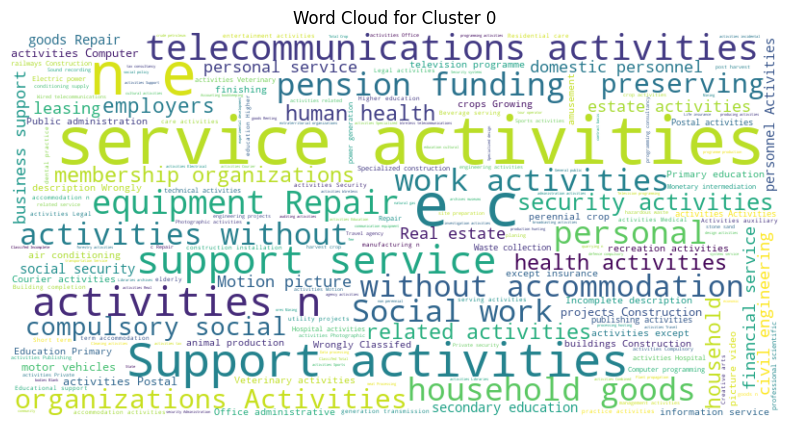

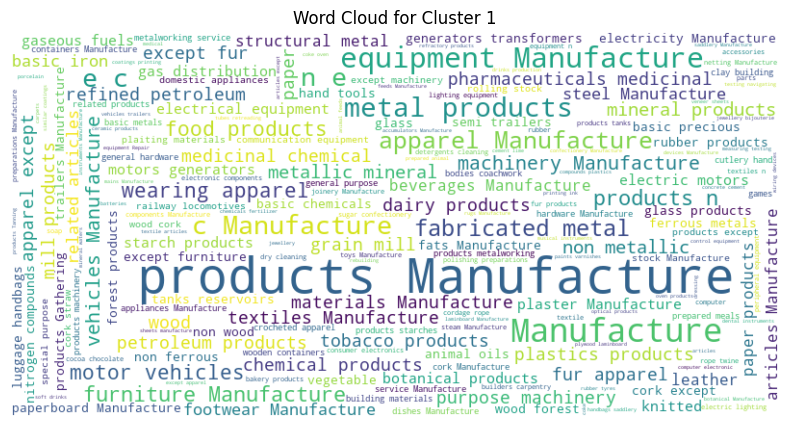

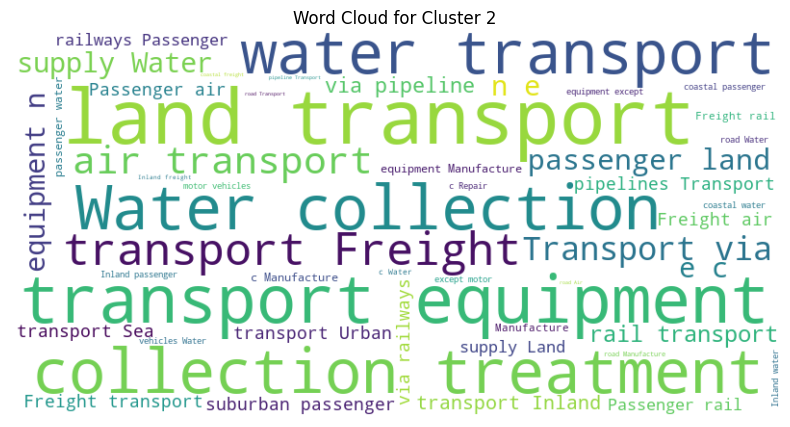

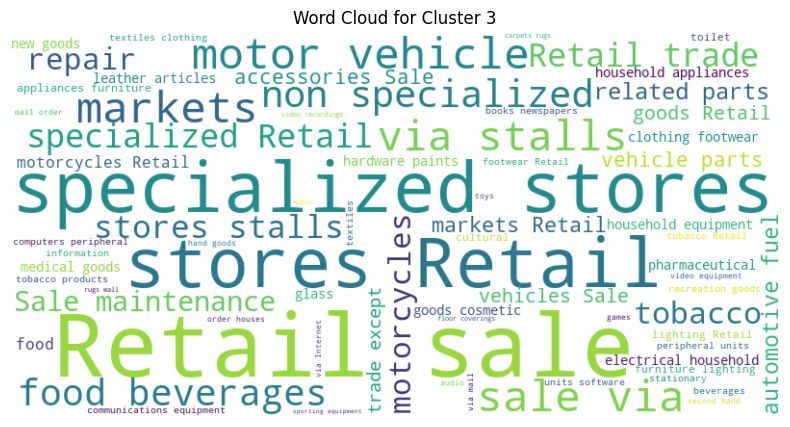

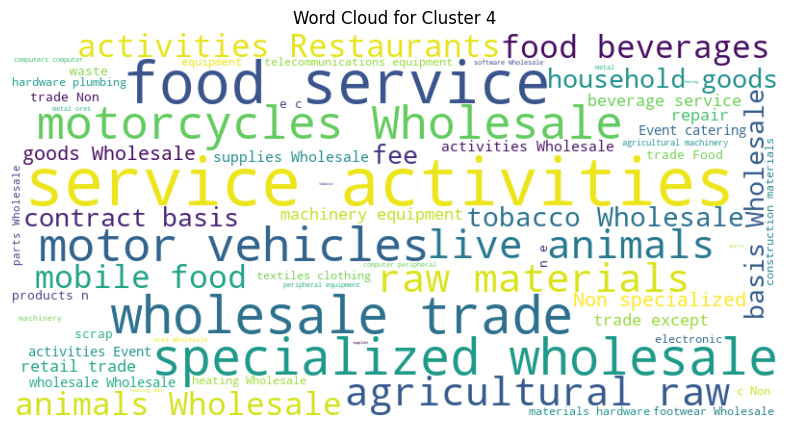

In [49]:
import os
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Function to merge CSV files in a folder
def merge_csv_files(folder_path):
    try:
        # List all CSV files in the folder
        csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

        # Initialize an empty list to store DataFrame objects
        dfs = []

        # Read each CSV file and append its DataFrame to the list
        for file in csv_files:
            file_path = os.path.join(folder_path, file)
            try:
                df = pd.read_csv(file_path, encoding='utf-8')
            except UnicodeDecodeError:
                try:
                    df = pd.read_csv(file_path, encoding='latin-1')
                except UnicodeDecodeError:
                    df = pd.read_csv(file_path, encoding='ISO-8859-1')
            dfs.append(df)

        # Concatenate all DataFrames into a single DataFrame
        merged_df = pd.concat(dfs, ignore_index=True)

        return merged_df
    except Exception as e:
        print("An error occurred:", e)

# Specify the folder path containing CSV files
folder_path = 'D:\Swetha Documents\RE-CT_PROJECT\DataSets'

# Merge CSV files in the folder
merged_df = merge_csv_files(folder_path)

# Tokenize and clean text data
text = ' '.join(merged_df['NIC Name'])
tokens = word_tokenize(text)
tokens = [word.lower() for word in tokens if word.isalpha()]
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]

# Count word frequency
word_freq = Counter(tokens)
print(word_freq.most_common(10))

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(merged_df['NIC Name'])

# KMeans Clustering
num_clusters = 5  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
merged_df['Cluster'] = kmeans.fit_predict(X_tfidf)

# Generate word clouds for each cluster
for cluster in range(num_clusters):
    text_for_cluster = merged_df[merged_df['Cluster'] == cluster]['NIC Name']
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text_for_cluster))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Cluster {cluster}')
    plt.axis('off')
    plt.show()

In [50]:
# Explanation:
# TF-IDF Vectorization:
# Converts the text data in the 'NIC Name' column into a numerical format.

# Scaling Numerical Data:
# Scales other numerical columns to ensure they contribute equally to the clustering process.

# Combining Features:
# Combines the TF-IDF features with the scaled numerical data.

# Clustering:
# Applies KMeans clustering to the combined features.

# Visualizations:
# Creates scatter plots and box plots to visualize the distribution of clusters and the relationship between various features.

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Vectorize the 'NIC Name' column using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
nic_name_tfidf = vectorizer.fit_transform(merged_df['NIC Name'])

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Step 2: Scale the numerical columns for clustering
scaler = StandardScaler()
numerical_columns = [
    'Main Workers - Total -  Persons', 'Main Workers - Total - Males', 'Main Workers - Total - Females',
    'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males', 'Main Workers - Rural - Females',
    'Main Workers - Urban -  Persons', 'Main Workers - Urban - Males', 'Main Workers - Urban - Females',
    'Marginal Workers - Total -  Persons', 'Marginal Workers - Total - Males', 'Marginal Workers - Total - Females',
    'Marginal Workers - Rural -  Persons', 'Marginal Workers - Rural - Males', 'Marginal Workers - Rural - Females',
    'Marginal Workers - Urban -  Persons', 'Marginal Workers - Urban - Males', 'Marginal Workers - Urban - Females'
]
numerical_data_scaled = scaler.fit_transform(merged_df[numerical_columns])

# Step 3: Combine TF-IDF features with scaled numerical data
from scipy.sparse import hstack
combined_features = hstack([nic_name_tfidf, numerical_data_scaled])

# Step 4: Determine the number of clusters and fit the KMeans model
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
merged_df['Cluster'] = kmeans.fit_predict(combined_features)

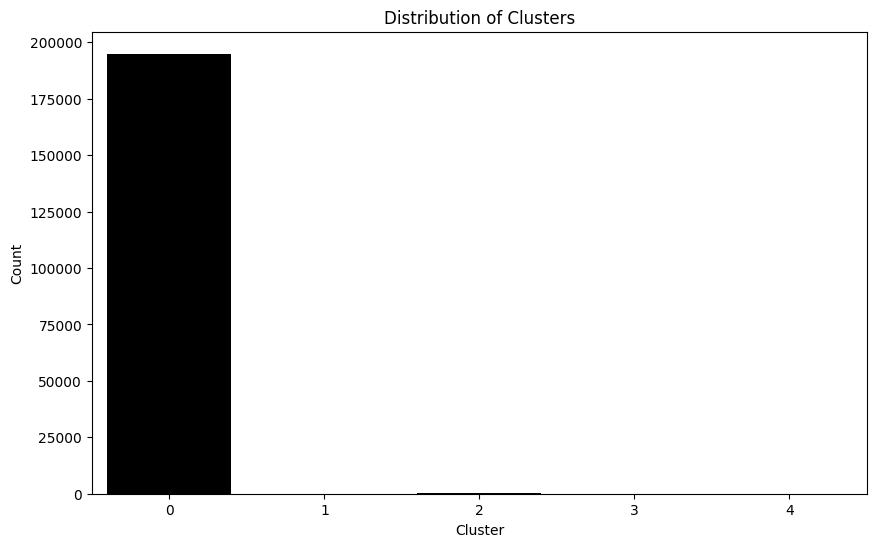

In [70]:
# Visualize the clustering results
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=merged_df,color='black')
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [54]:
# Count the frequency of each 'NIC Name'
nic_name_counts = merged_df['NIC Name'].value_counts()

# Get the top 10 most frequent 'NIC Name' categories
top_10_nic_names = nic_name_counts.head(10).index.tolist()


In [55]:
# Filter the DataFrame to include only rows where 'NIC Name' is in the top 10 most frequent categories
top_10_merged_df = merged_df[merged_df['NIC Name'].isin(top_10_nic_names)]


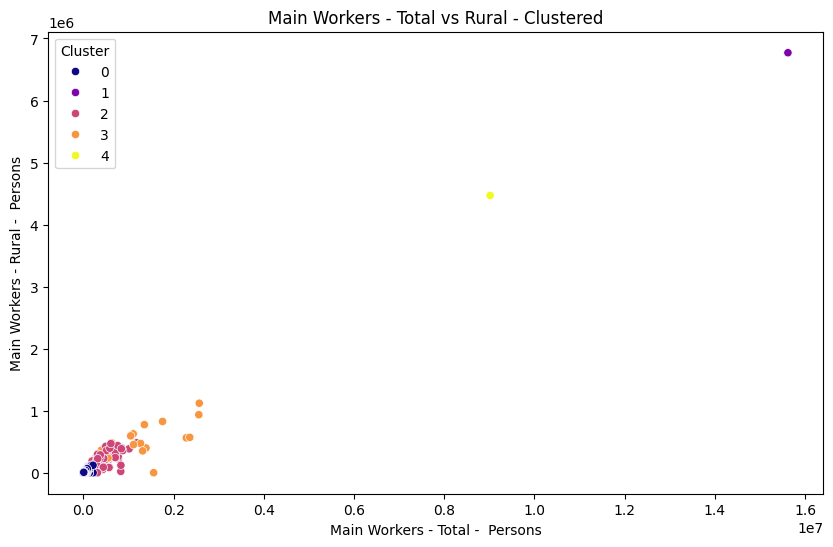

In [81]:
# Scatter plot for 'Main Workers - Total - Persons' vs 'Main Workers - Rural - Persons'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Main Workers - Total -  Persons', y='Main Workers - Rural -  Persons', hue='Cluster', data=merged_df,palette='plasma')
plt.title('Main Workers - Total vs Rural - Clustered')
plt.xlabel('Main Workers - Total -  Persons')
plt.ylabel('Main Workers - Rural -  Persons')
plt.show()

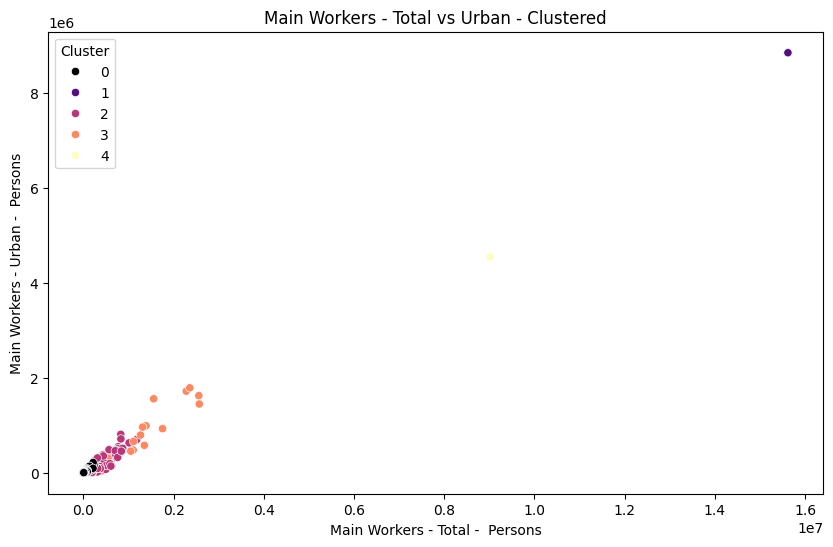

In [82]:
# Scatter plot for 'Main Workers - Total - Persons' vs 'Main Workers - Urban - Persons'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Main Workers - Total -  Persons', y='Main Workers - Urban -  Persons', hue='Cluster', data=merged_df, palette='magma')
plt.title('Main Workers - Total vs Urban - Clustered')
plt.xlabel('Main Workers - Total -  Persons')
plt.ylabel('Main Workers - Urban -  Persons')
plt.show()

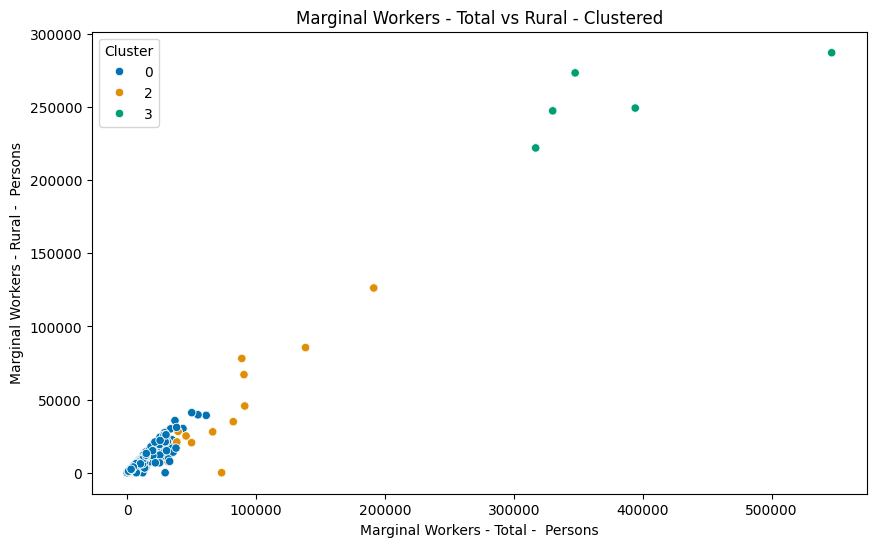

In [83]:
# Scatter plot for 'Marginal Workers - Total - Persons' vs 'Marginal Workers - Rural - Persons'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Marginal Workers - Total -  Persons', y='Marginal Workers - Rural -  Persons', hue='Cluster', data=top_10_merged_df, palette='colorblind')
plt.title('Marginal Workers - Total vs Rural - Clustered')
plt.xlabel('Marginal Workers - Total -  Persons')
plt.ylabel('Marginal Workers - Rural -  Persons')
plt.show()


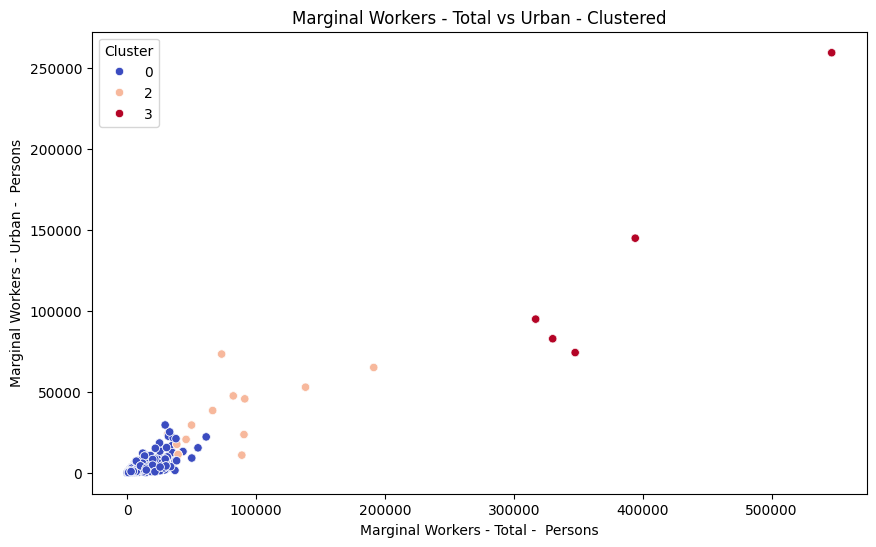

In [84]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Marginal Workers - Total -  Persons', y='Marginal Workers - Urban -  Persons', hue='Cluster', data=top_10_merged_df, palette='coolwarm')
plt.title('Marginal Workers - Total vs Urban - Clustered')
plt.xlabel('Marginal Workers - Total -  Persons')
plt.ylabel('Marginal Workers - Urban -  Persons')
plt.show()

In [60]:
import pandas as pd

# Check for non-numeric values in a DataFrame
def check_non_numeric(df):
    non_numeric_cols = []
    for col in df.columns:
        try:
            pd.to_numeric(df[col])
        except ValueError:
            non_numeric_cols.append(col)
    return non_numeric_cols

# Call the function to check for non-numeric values
non_numeric_columns = check_non_numeric(merged_df)
print("Columns with non-numeric values:", non_numeric_columns)


Columns with non-numeric values: ['State Code', 'District Code', 'India/States', 'Division', 'Group', 'Class', 'NIC Name']


In [61]:
# Remove backticks from the 'Class' column
merged_df['Class'] = merged_df['Class'].str.replace('`', '')

# Convert 'Class' column to numeric
merged_df['Class'] = pd.to_numeric(merged_df['Class'], errors='coerce')

In [62]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder


# Initialize an instance of TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'NIC Name' column to convert text data into numerical vectors
X_nic_name = tfidf_vectorizer.fit_transform(merged_df['NIC Name'])

# Define columns to encode
columns_to_encode = ['State Code', 'District Code','India/States', 'Division', 'Group','NIC Name']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
for column in columns_to_encode:
    merged_df[column] = label_encoder.fit_transform(merged_df[column])

# Check data types after encoding
print(merged_df.dtypes)

# Now, X_nic_name contains the TF-IDF transformed 'NIC Name' data, and merged_df_encoded contains the encoded categorical variables.

State Code                             int32
District Code                          int32
India/States                           int32
Division                               int32
Group                                  int32
Class                                  int64
NIC Name                               int32
Main Workers - Total -  Persons        int64
Main Workers - Total - Males           int64
Main Workers - Total - Females         int64
Main Workers - Rural -  Persons        int64
Main Workers - Rural - Males           int64
Main Workers - Rural - Females         int64
Main Workers - Urban -  Persons        int64
Main Workers - Urban - Males           int64
Main Workers - Urban - Females         int64
Marginal Workers - Total -  Persons    int64
Marginal Workers - Total - Males       int64
Marginal Workers - Total - Females     int64
Marginal Workers - Rural -  Persons    int64
Marginal Workers - Rural - Males       int64
Marginal Workers - Rural - Females     int64
Marginal W

In [63]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define columns to encode
columns_to_encode = ['State Code', 'District Code', 'India/States', 'Division', 'Group', 'NIC Name']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
for column in columns_to_encode:
    merged_df[column] = label_encoder.fit_transform(merged_df[column])

# Assuming 'Class' is the target variable
X = merged_df.drop(columns=['Class'])  # Features
y = merged_df['Class']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R² score:', r2_score(y_test, y_pred))

Mean Absolute Error: 1892.7670415272423
Mean Squared Error: 6082901.434440056
Root Mean Squared Error: 2466.353874536267
R² score: 0.35250652697056617


In [64]:
merged_df.head(2)

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females,Cluster
0,7,0,468,0,0,0,543,211353,160166,51187,...,38415,19776,18639,24581,12610,11971,13834,7166,6668,2
1,7,0,468,1,0,0,69,12967,8180,4787,...,2975,1211,1764,2545,1004,1541,430,207,223,0


In [65]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Convert 'Class' column to numeric
merged_df['Class'] = pd.to_numeric(merged_df['Class'], errors='coerce')

# Define columns to encode
categorical_features = ['State Code', 'District Code', 'India/States', 'Division', 'Group']
text_column = 'NIC Name'

merged_df[text_column] = merged_df[text_column].astype(str)

# Define preprocessing steps for categorical features and text column
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
text_transformer = TfidfVectorizer(stop_words='english')

# Create a preprocessor to apply transformations to appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('text', text_transformer, text_column)
    ])

# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split data into features and target
X = merged_df.drop(columns=['Class'])  # Features
y = merged_df['Class']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R² score:', r2_score(y_test, y_pred))

Mean Absolute Error: 918.0132042361479
Mean Squared Error: 2945481.5910309376
Root Mean Squared Error: 1716.2405399683744
R² score: 0.686468681816403
